
# Exploratory Data Analysis (EDA) for NYC Water Demand Forecasting

This notebook conducts an exploratory data analysis on the New York City water consumption data from 1979 to 2019. The goal is to understand the dataset's characteristics and identify trends and patterns that will inform the selection of forecasting models.

## Data Description

The dataset includes the following columns:

- **Year**: The year of the observation.
- **New York City Population**: The population of New York City in that year.
- **NYC Consumption (Million gallons per day)**: The total water consumption in New York City for that year, measured in million gallons per day.
- **Per Capita (Gallons per person per day)**: The average water consumption per person per day in gallons.

Let's start by loading the data and examining its basic properties.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('water-consumption-in-the-new-york-city.csv')

In [17]:
# Display basic information and the first few rows of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      41 non-null     int64  
 1   New York City Population                  41 non-null     float64
 2   NYC Consumption(Million gallons per day)  41 non-null     float64
 3   Per Capita(Gallons per person per day)    41 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 KB
None


In [18]:
print(data.head())

   Year  New York City Population  NYC Consumption(Million gallons per day)  \
0  1979                 7102100.0                                    1512.0   
1  1980                 7071639.0                                    1506.0   
2  1981                 7089241.0                                    1309.0   
3  1982                 7109105.0                                    1382.0   
4  1983                 7181224.0                                    1424.0   

   Per Capita(Gallons per person per day)  
0                                     213  
1                                     213  
2                                     185  
3                                     194  
4                                     198  


In [36]:
# Check for missing data
missing_data = data.isnull().sum()

print(missing_data)


Year                                        0
New York City Population                    0
NYC Consumption(Million gallons per day)    0
Per Capita(Gallons per person per day)      0
dtype: int64


## Data Visualization

### Time Series Plots

Visualizing the time series trends for population, total water consumption, and per capita water consumption.

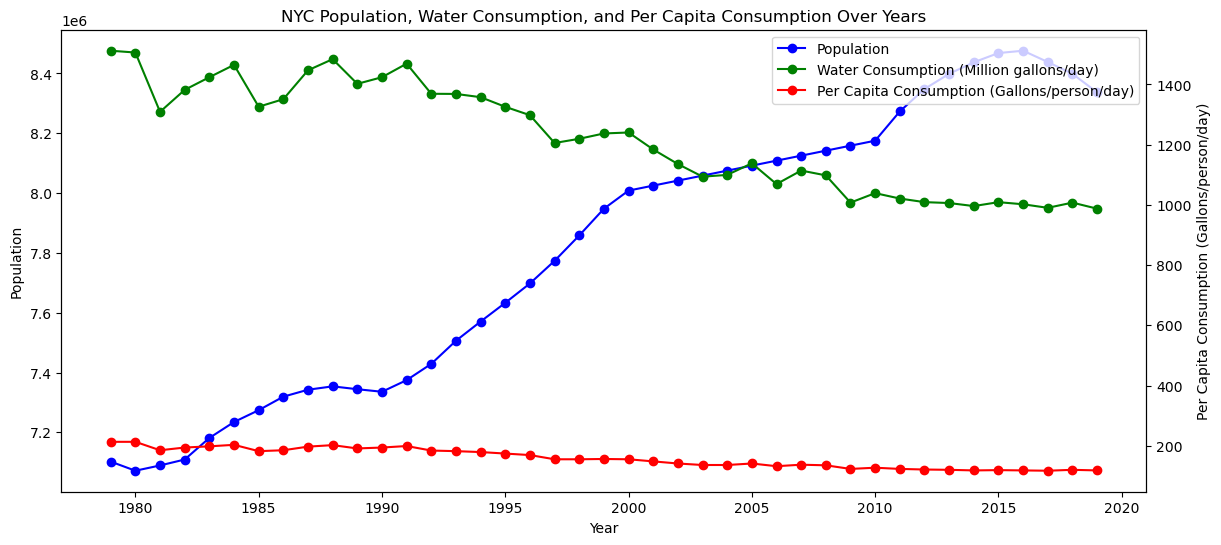

In [25]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary y-axis for Population
ax1.plot(data['Year'], data['New York City Population'], marker='o', color='blue', label='Population')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
ax1.tick_params(axis='y')

# Create a second y-axis for Water Consumption and Per Capita Consumption
ax2 = ax1.twinx()
ax2.plot(data['Year'], data['NYC Consumption(Million gallons per day)'], marker='o', color='green', label='Water Consumption (Million gallons/day)')
ax2.set_ylabel('Water Consumption (Million gallons/day)')
ax2.tick_params(axis='y')

ax2.plot(data['Year'], data['Per Capita(Gallons per person per day)'], marker='o', color='red', label='Per Capita Consumption (Gallons/person/day)')
ax2.set_ylabel('Per Capita Consumption (Gallons/person/day)')
ax2.tick_params(axis='y')

# Handling the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('NYC Population, Water Consumption, and Per Capita Consumption Over Years')
plt.show()



### Multi Scatter Plot

Creating scatter plots to visualize the relationships between population, total water consumption, and per capita consumption.

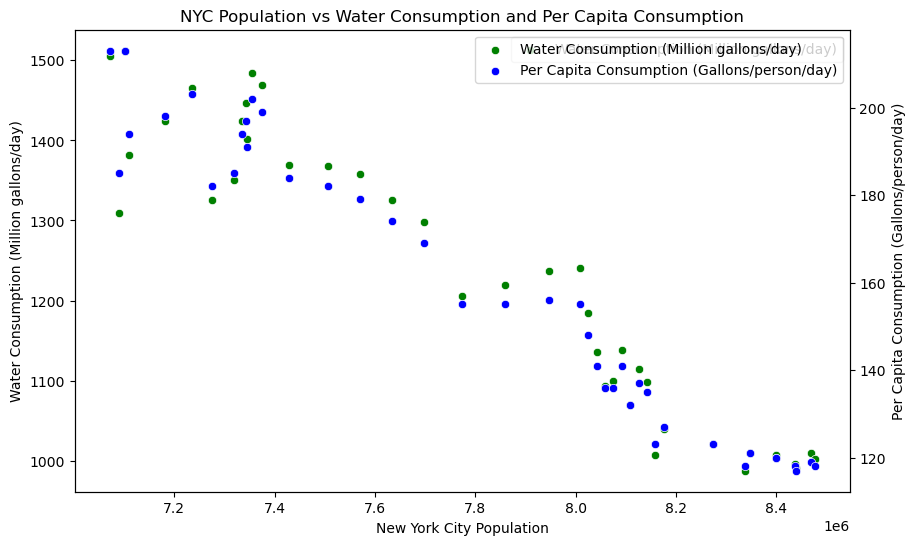

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for Population vs Water Consumption
sns.scatterplot(x='New York City Population', y='NYC Consumption(Million gallons per day)', data=data, ax=ax1, color='green', label='Water Consumption (Million gallons/day)')
ax1.set_xlabel('New York City Population')
ax1.set_ylabel('Water Consumption (Million gallons/day)')

# Create a second y-axis for Population vs Per Capita Consumption
ax2 = ax1.twinx()
sns.scatterplot(x='New York City Population', y='Per Capita(Gallons per person per day)', data=data, ax=ax2, color='blue', label='Per Capita Consumption (Gallons/person/day)')
ax2.set_ylabel('Per Capita Consumption (Gallons/person/day)')


# Handling the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('NYC Population vs Water Consumption and Per Capita Consumption')
plt.show()


### Correlation Matrix

Analyzing the correlation between different variables in the dataset.

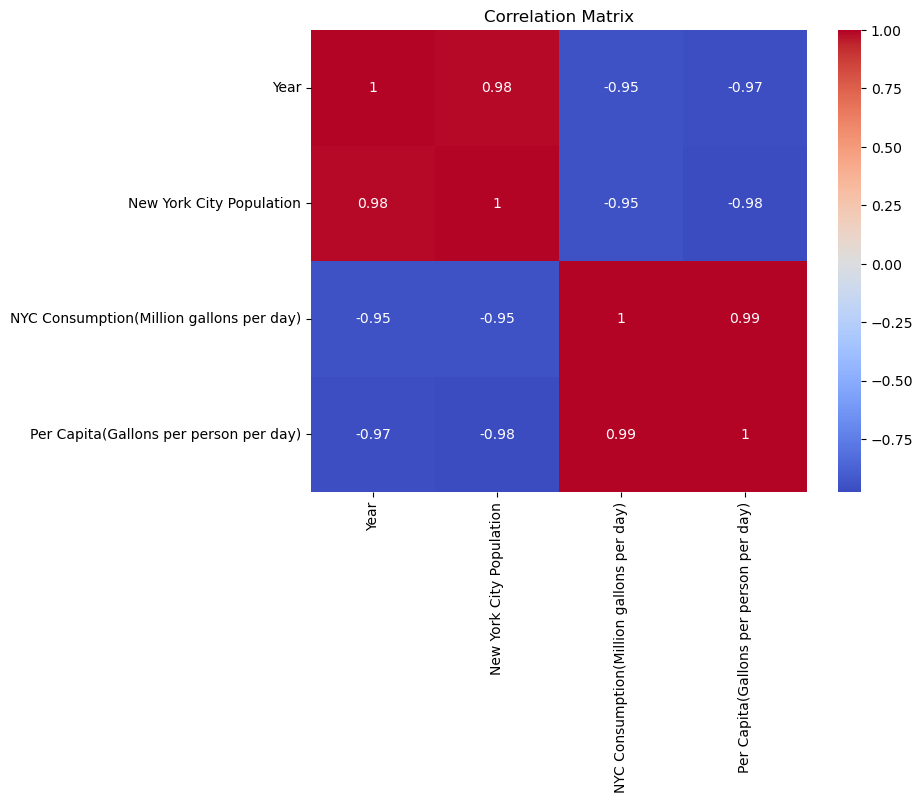

In [12]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()